In [55]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
with xr.open_dataset('output/lmr_v21_avg_reg11.nc') as ds:
    ds_lmr_v21_past = ds.load()

with xr.open_dataset('output/lmr_v21_avg_hist_reg11.nc') as ds:
    ds_lmr_v21_hist = ds.load()

with xr.open_dataset('output/lmr_online_avg_reg11.nc') as ds:
    ds_lmr_online_past = ds.load()
    
with xr.open_dataset('output/lmr_online_avg_hist_reg11.nc') as ds:
    ds_lmr_online_hist = ds.load()

with xr.open_dataset('output/lmr_mira_hist_reg11.nc') as ds:
    ds_mira_hist = ds.load()

with xr.open_dataset('output/lmr_mira_nat_reg11.nc') as ds:
    ds_mira_nat = ds.load()

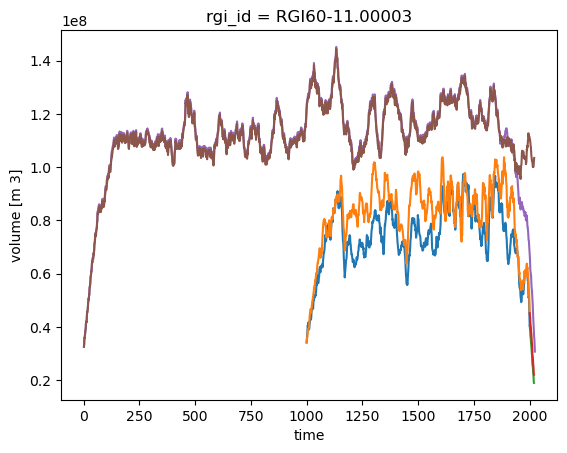

In [75]:
ds_lmr_v21_past.isel(rgi_id=2).volume.plot();
ds_lmr_online_past.isel(rgi_id=2).volume.plot();
ds_lmr_v21_hist.isel(rgi_id=2).volume.plot();
ds_lmr_online_hist.isel(rgi_id=2).volume.plot();

ds_mira_hist.isel(rgi_id=2).volume.plot();
ds_mira_nat.isel(rgi_id=2).volume.plot();

In [76]:
ds_lmr_online_hist.isel(time=0).volume.isnull().sum().item()

71

In [77]:
ds_mira_hist.isel(time=0).volume.isnull().sum().item()

254

In [78]:
valid_ids = ((~ds_mira_hist.isel(time=0).volume.isnull().data) & 
            (~ds_mira_nat.isel(time=0).volume.isnull().data) & 
            (~ds_lmr_online_hist.isel(time=0).volume.isnull().data) & 
            (~ds_lmr_v21_hist.isel(time=0).volume.isnull().data) 
            )

In [79]:
df = pd.read_csv('https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/W5E5/per_glacier_spinup/RGI62/b_160/L3/summary/glacier_statistics_11.csv',
                 index_col=0)

In [80]:
valid_ids = ds_mira_nat.sel(rgi_id=valid_ids).rgi_id.data

In [81]:
dfok = df.loc[valid_ids]

In [82]:
dfok.rgi_area_km2.sum() / df.rgi_area_km2.sum(), dfok.inv_volume_km3.sum() / df.inv_volume_km3.sum()

(np.float64(0.9936275957796448), np.float64(0.9975382339826857))

In [83]:
dfs = df[['rgi_region', 'rgi_subregion', 'name', 'cenlon', 'cenlat', 
          'rgi_area_km2', 'rgi_year', 'main_flowline_length', 
          'inv_volume_km3', 'reference_mb', 'reference_mb_err']]

In [84]:
dfs.to_csv('filtered_histnat/glacier_statistics_reg11.csv')

In [85]:
ds_lmr_v21 = xr.concat([ds_lmr_v21_past.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), ds_lmr_v21_hist.sel(rgi_id=valid_ids)], dim='time')
ds_lmr_online = xr.concat([ds_lmr_online_past.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), ds_lmr_online_hist.sel(rgi_id=valid_ids)], dim='time')
# _dsmb = xr.concat([dsmb.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), dshb.sel(rgi_id=valid_ids)], dim='time')
# _dsmbc = dsmbc.sel(rgi_id=valid_ids)

/tmp/ipykernel_1178763/1156441226.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_lmr_v21 = xr.concat([ds_lmr_v21_past.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), ds_lmr_v21_hist.sel(rgi_id=valid_ids)], dim='time')
/tmp/ipykernel_1178763/1156441226.py:2: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.


In [86]:
ds_mira_hist = ds_mira_hist.sel(rgi_id=valid_ids)
ds_mira_nat = ds_mira_nat.sel(rgi_id=valid_ids)

In [87]:
import seaborn as sns

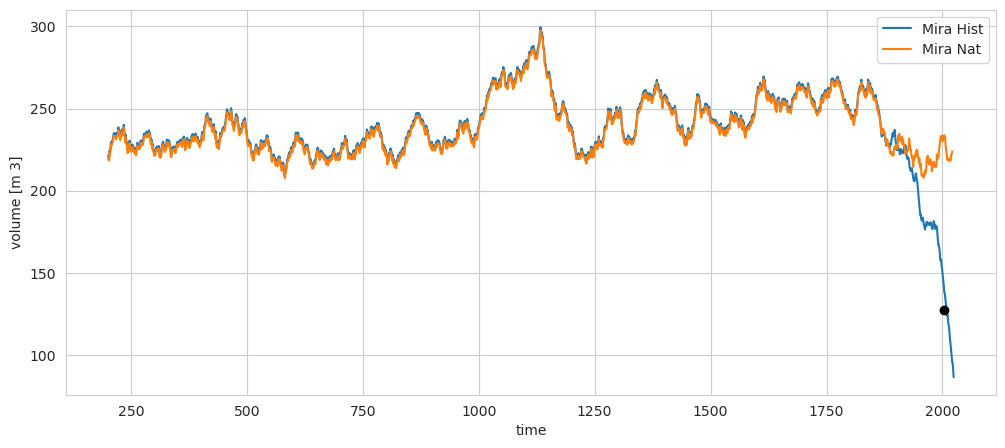

In [88]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    (ds_mira_hist.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='Mira Hist');
    (ds_mira_nat.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='Mira Nat');
    plt.plot(2003, dfok.inv_volume_km3.sum(), 'o', c='k');
    plt.legend();

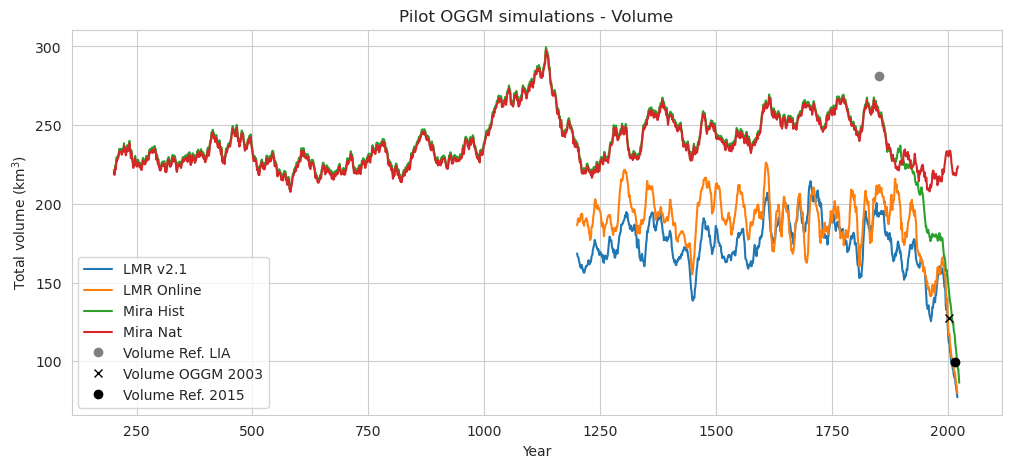

In [92]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    (ds_lmr_v21.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1');
    (ds_lmr_online.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR Online');
    (ds_mira_hist.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='Mira Hist');
    (ds_mira_nat.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='Mira Nat');
    plt.plot(1850, dfo.loc[17]['Volume LIA'], 'o', c='grey', label='Volume Ref. LIA');
    plt.plot(2003, dfok.inv_volume_km3.sum(), 'x', c='k', label='Volume OGGM 2003');
    plt.plot(2015, dfo.loc[17]['Volume 2015'], 'o', c='k', label='Volume Ref. 2015');
    plt.xlabel(''); plt.ylabel('Total volume (km$^3$)'); plt.xlabel('Year');
    plt.legend(loc='lower left'); plt.title('Pilot OGGM simulations - Volume');
    plt.legend();

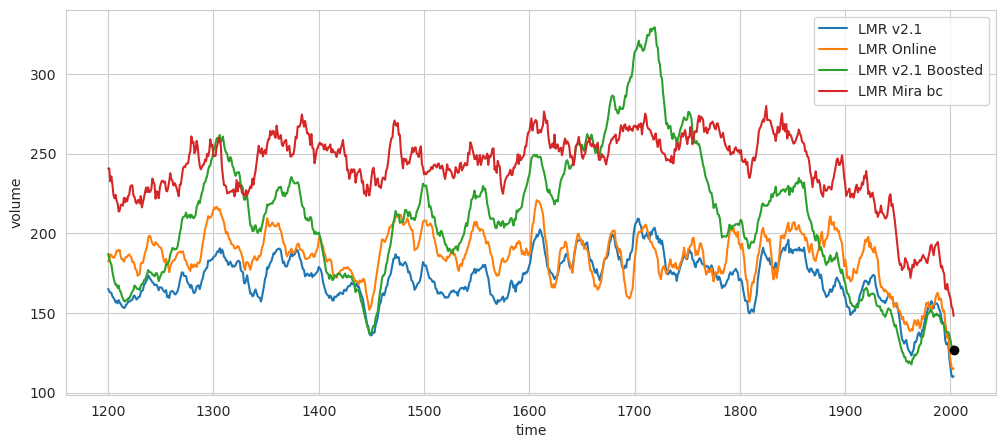

In [21]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    (_dsm.volume.sel(time=slice(1200, 2003)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1');
    (_dsmo.volume.sel(time=slice(1200, 2003)).sum(dim='rgi_id')*1e-9).plot(label='LMR Online');
    (_dsmb.volume.sel(time=slice(1200, 2003)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1 Boosted');
    (_dsmbc.volume.sel(time=slice(1200, 2003)).sum(dim='rgi_id')*1e-9).plot(label='LMR Mira bc');
    plt.plot(2003, dfok.inv_volume_km3.sum(), 'o', c='k');
    plt.legend();

In [31]:
dfo = pd.read_csv('filtered_update/Area_volume_change_LIA_Alps.csv', encoding='ISO-8859-1', index_col=0, skiprows=[1])
dfo

Main division              Region name  Area LIA  Area 2003  \
Region ID                                                               
1                  west            Dauphiné Alps    159.04      90.77   
2                  west  Cottian & Maritime Alps     20.69       2.68   
3                  west              Graian Alps    636.44     332.27   
4                  west            Savoy Prealps     16.45       8.25   
5                  west             Pennine Alps    703.03     431.00   
6                  west             Bernese Alps    689.78     462.42   
7                  west              Glarus Alps    107.52      53.23   
8                  west           Lepontine Alps    182.72      52.40   
9                  east       Rhaetian Alps West    352.62     147.96   
10                 east       Rhaetian Alps East    470.85     207.99   
11                 east      Rhaetian Alps South    284.48     122.53   
12                 east         Tauern Alps West    540.64     195.52   
13                 east  Dolomites & Carnic Alps     23.24       4.80   
14                 east        Northeastern Alps     23.62       7.32   
15                 west             Western Alps   2515.67    1433.02   
16                 east             Eastern Alps   1695.45     686.12   
17                  All                     Alps   4211.12    2119.14   

           Area 2015  Relative area change (P1)  Relative area change (P3)  \
Region ID                                                                    
1              64.76                     -42.93                     -59.28   
2               1.55                     -87.03                     -92.52   
3             267.42                     -47.79                     -57.98   
4               4.40                     -49.84                     -73.24   
5             387.67                     -38.69                     -44.86   
6             389.37                     -32.96                     -43.55   
7              41.49                     -50.50                     -61.41   
8              39.51                     -71.32                     -78.37   
9             118.38                     -58.04                     -66.43   
10            185.97                     -55.83                     -60.50   
11            100.59                     -56.93                     -64.64   
12            194.76                     -63.83                     -63.98   
13              4.20                     -79.35                     -81.91   
14              6.17                     -69.00                     -73.89   
15           1196.17                     -43.06                     -52.45   
16            610.07                     -59.53                     -64.02   
17           1806.24                     -49.97                     -57.27   

           Relative area change rate (P1)  Relative area change rate (P2)  \
Region ID                                                                   
1                                   -0.28                           -2.39   
2                                   -0.57                           -3.53   
3                                   -0.31                           -1.63   
4                                   -0.33                           -3.89   
5                                   -0.25                           -0.84   
6                                   -0.22                           -1.32   
7                                   -0.33                           -1.84   
8                                   -0.47                           -2.05   
9                                   -0.38                           -1.67   
10                                  -0.36                           -0.88   
11                                  -0.37                           -1.49   
12                                  -0.42                           -0.03   
13                                  -0.52                    

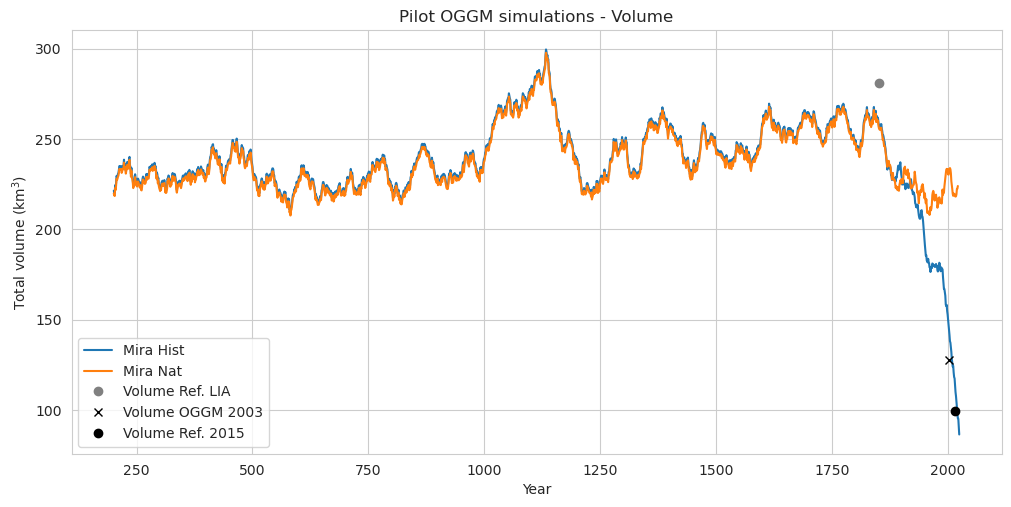

In [53]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5.5))
    # (_dsm.volume.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1');
    # (_dsmo.volume.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR Online');
    # # (_dsmb.volume.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1 Boosted');
    (ds_mira_hist.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='Mira Hist');
    (ds_mira_nat.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='Mira Nat');
    plt.plot(1850, dfo.loc[17]['Volume LIA'], 'o', c='grey', label='Volume Ref. LIA');
    plt.plot(2003, dfok.inv_volume_km3.sum(), 'x', c='k', label='Volume OGGM 2003');
    plt.plot(2015, dfo.loc[17]['Volume 2015'], 'o', c='k', label='Volume Ref. 2015');
    plt.xlabel(''); plt.ylabel('Total volume (km$^3$)'); plt.xlabel('Year');
    plt.legend(loc='lower left'); plt.title('Pilot OGGM simulations - Volume');
    plt.savefig(fname='oggm_pilot.png', bbox_inches='tight', dpi=150)

In [24]:
_dsm.area_min_h

<xarray.DataArray 'area_min_h' (time: 1021, rgi_id: 3508)>
array([[851000.   ,  52832.016,  57000.   , ...,  37000.   ,  10000.   ,
         12703.455],
       [854188.06 ,  53997.746, 113746.55 , ...,  37251.633,  10178.677,
         13258.43 ],
       [857689.8  ,  61755.25 , 216183.1  , ...,  37469.223,  27336.441,
         23921.652],
       ...,
       [883547.3  , 101597.97 , 418282.84 , ...,      0.   ,  30206.752,
         57456.63 ],
       [875726.44 ,  98110.27 , 415300.1  , ...,      0.   ,  24775.527,
         51606.93 ],
       [874331.56 ,  95178.375, 415568.66 , ...,      0.   ,  21221.303,
         51543.145]], dtype=float32)
Coordinates:
  * time            (time) float64 1e+03 1.001e+03 ... 2.019e+03 2.02e+03
  * rgi_id          (rgi_id) object 'RGI60-11.00003' ... 'RGI60-11.03926'
    hydro_year      (time) int64 1000 1001 1002 1003 ... 2017 2018 2019 2020
    hydro_month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    calendar_year   (time) int64 1000 1001 1002 1003 ... 2017 2018 2019 2020
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    description:  Total glacier area of gridpoints with a minimum icethicknes...
    unit:         m 2

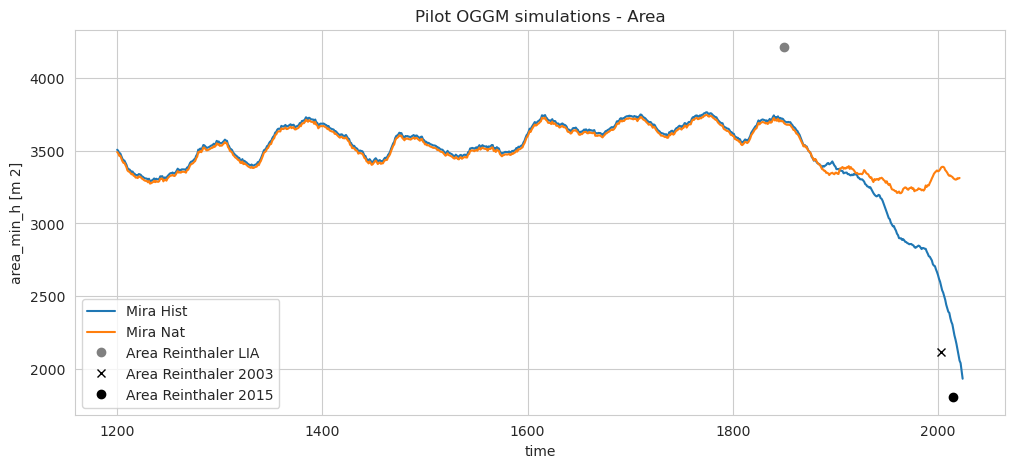

In [54]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    # (_dsm.area_min_h.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-6).plot(label='LMR v2.1');
    # (_dsmo.area_min_h.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-6).plot(label='LMR Online');
    (ds_mira_hist.area_min_h.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-6).plot(label='Mira Hist');
    (ds_mira_nat.area_min_h.sel(time=slice(1200, None)).sum(dim='rgi_id')*1e-6).plot(label='Mira Nat');
    plt.plot(1850, dfo.loc[17]['Area LIA'], 'o', c='grey', label='Area Reinthaler LIA');
    plt.plot(2003, dfo.loc[17]['Area 2003'], 'x', c='k', label='Area Reinthaler 2003');
    plt.plot(2015, dfo.loc[17]['Area 2015'], 'o', c='k', label='Area Reinthaler 2015');
    plt.legend(loc='lower left'); plt.title('Pilot OGGM simulations - Area');
    plt.legend();

In [65]:
dfo.loc[17]

Main division                          All
Region name                           Alps
Area LIA                           4211.12
Area 2003                          2119.14
Area 2015                          1806.24
Relative area change (P1)           -49.97
Relative area change (P3)           -57.27
Relative area change rate (P1)       -0.32
Relative area change rate (P2)       -1.23
Volume LIA                          280.95
Volume 2015                          99.64
Volume change (P3)                 -181.31
Mean elevation change (P3)          -43.32
Elevation change rate (P1)           -0.25
Elevation change rate (P3)           -0.26
Elevation change rate (P2)           -0.82
Increase rate (P2/P1)                  3.3
Change of median elevation (P3)        143
Name: 17, dtype: object

In [54]:
_dsm.time

<xarray.DataArray 'time' (time: 1021)>
array([1000., 1001., 1002., ..., 2018., 2019., 2020.])
Coordinates:
  * time            (time) float64 1e+03 1.001e+03 ... 2.019e+03 2.02e+03
    hydro_year      (time) int64 1000 1001 1002 1003 ... 2017 2018 2019 2020
    hydro_month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    calendar_year   (time) int64 1000 1001 1002 1003 ... 2017 2018 2019 2020
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    description:  Floating year

In [55]:
_dsmbc.time

<xarray.DataArray 'time' (time: 2024)>
array([1.000e+00, 2.000e+00, 3.000e+00, ..., 2.022e+03, 2.023e+03, 2.024e+03])
Coordinates:
  * time            (time) float64 1.0 2.0 3.0 ... 2.022e+03 2.023e+03 2.024e+03
    hydro_year      (time) int64 1 2 3 4 5 6 7 ... 2019 2020 2021 2022 2023 2024
    hydro_month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    calendar_year   (time) int64 1 2 3 4 5 6 7 ... 2019 2020 2021 2022 2023 2024
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    description:  Floating year

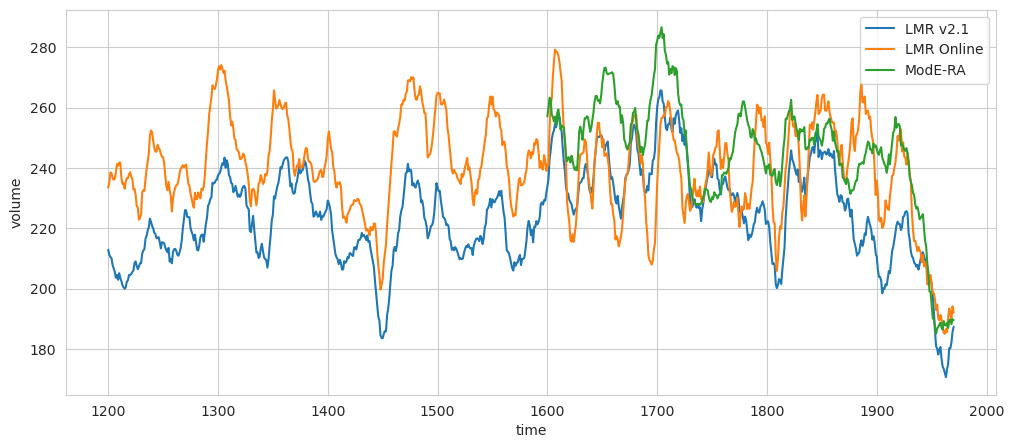

In [20]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    (_dsm.volume.sel(time=slice(1200, 1970)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1');
    (_dsmo.volume.sel(time=slice(1200, 1970)).sum(dim='rgi_id')*1e-9).plot(label='LMR Online');
    (_dsme.volume.sel(time=slice(1600, 1970)).sum(dim='rgi_id')*1e-9).plot(label='ModE-RA');
    # plt.plot(2003, dfok.inv_volume_km3.sum(), 'o', c='k');
    plt.legend();

In [52]:
ds_mira_hist.to_netcdf('filtered_histnat//mira_hist.nc')
ds_mira_nat.to_netcdf('filtered_histnat/mira_nat.nc')
# _dsmb.to_netcdf('filtered_update/lmr_v21_avg_boosted_reg11.nc')
# _dsmbc.to_netcdf('filtered_update/lmr_mira_bc_reg11.nc')

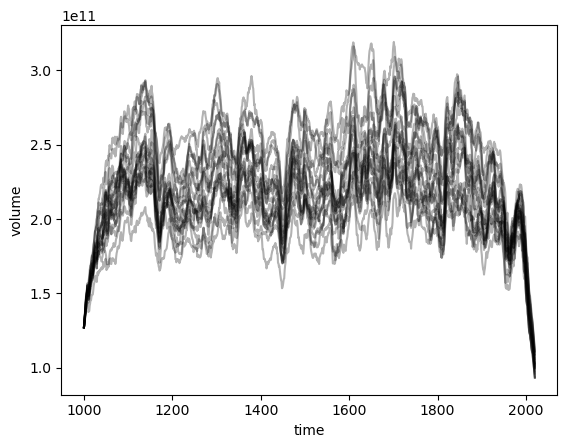

In [23]:
for ens in range(0, 20):
    with xr.open_dataset(f'output/lmr_v21_ens/lmr_v21_ens{ens}_hist_reg11.nc') as dsh:
        with xr.open_dataset(f'output/lmr_v21_ens/lmr_v21_ens{ens}_reg11.nc') as dse:
            ds = xr.concat([dse.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), dsh.sel(rgi_id=valid_ids)], dim='time')
            ds.to_netcdf(f'filtered_update/ensemble_members/lmr_v21_ens{ens}_reg11.nc')
            
            ds.volume.sum(dim='rgi_id').plot(c='k', alpha=0.3);

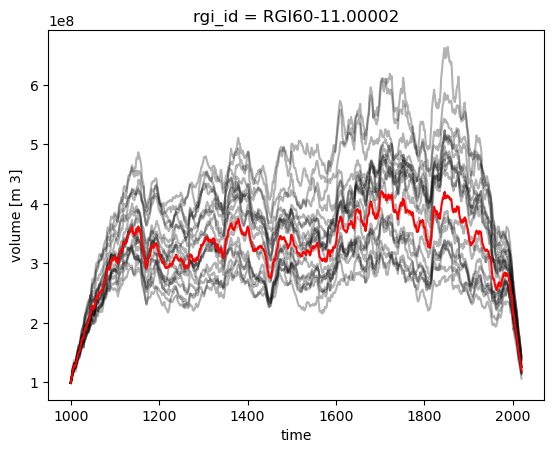

In [13]:

for ens in range(0, 20):

    with xr.open_dataset(f'output/lmr_v21_ens{ens}_reg11.nc') as ds:
        dsm = ds.load()
    with xr.open_dataset(f'output/lmr_v21_ens{ens}_hist_reg11.nc') as ds:
        dsh = ds.load()
    dsm.isel(rgi_id=1).volume.plot(c='k', alpha=0.3);
    dsh.isel(rgi_id=1).volume.plot(c='k', alpha=0.3);
    

with xr.open_dataset('output/lmr_v21_avg_reg11.nc') as ds:
    dsm = ds.load()
with xr.open_dataset('output/lmr_v21_avg_hist_reg11.nc') as ds:
    dsh = ds.load()
dsm.isel(rgi_id=1).volume.plot(c='r');
dsh.isel(rgi_id=1).volume.plot(c='r');

## ModERA 

In [3]:
with xr.open_dataset('work/out/modera_avg_reg11.nc') as ds:
    dsm = ds.load()

with xr.open_dataset('work/out/modera_avg_hist_reg11.nc') as ds:
    dsh = ds.load()

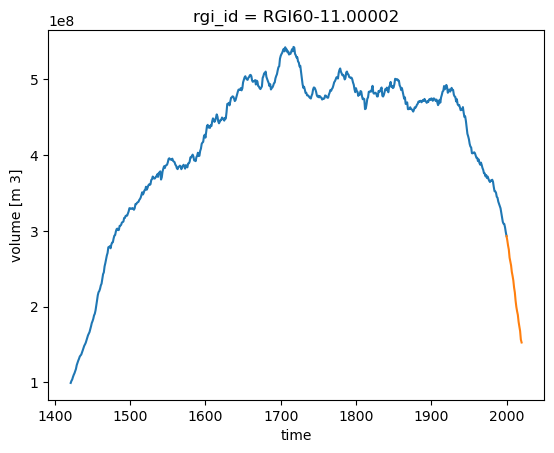

In [4]:
dsm.isel(rgi_id=1).volume.plot();
dsh.isel(rgi_id=1).volume.plot();